In [1]:
import numpy as np

def needleman_wunsch(seq1, seq2, match=1, mismatch=-1, gap_penalty=-2):
    m, n = len(seq1), len(seq2)
    
    # Initialize the matrix
    matrix = np.zeros((m + 1, n + 1))
    
    # Initialize the first row and column with gap penalties
    for i in range(1, m + 1):
        matrix[i][0] = matrix[i-1][0] + gap_penalty
    for j in range(1, n + 1):
        matrix[0][j] = matrix[0][j-1] + gap_penalty
    
    # Fill in the matrix
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            match_score = matrix[i-1][j-1] + (match if seq1[i-1] == seq2[j-1] else mismatch)
            delete_score = matrix[i-1][j] + gap_penalty
            insert_score = matrix[i][j-1] + gap_penalty
            matrix[i][j] = max(match_score, delete_score, insert_score)
    
    # Backtracking
    alignment_seq1, alignment_seq2 = "", ""
    i, j = m, n
    while i > 0 or j > 0:
        if i > 0 and j > 0 and matrix[i][j] == matrix[i-1][j-1] + (match if seq1[i-1] == seq2[j-1] else mismatch):
            alignment_seq1 = seq1[i-1] + alignment_seq1
            alignment_seq2 = seq2[j-1] + alignment_seq2
            i -= 1
            j -= 1
        elif i > 0 and matrix[i][j] == matrix[i-1][j] + gap_penalty:
            alignment_seq1 = seq1[i-1] + alignment_seq1
            alignment_seq2 = "-" + alignment_seq2
            i -= 1
        else:
            alignment_seq1 = "-" + alignment_seq1
            alignment_seq2 = seq2[j-1] + alignment_seq2
            j -= 1
    
    return alignment_seq1, alignment_seq2, matrix[m][n]

# Example usage:
sequence1 = "gaatggmeeff"
sequence2 = "gatgmeff"

alignment_seq1, alignment_seq2, alignment_score = needleman_wunsch(sequence1, sequence2)

print("Alignment Sequence 1:", alignment_seq1)
print("Alignment Sequence 2:", alignment_seq2)
print("Alignment Score:", alignment_score)


Alignment Sequence 1: gaatggmeeff
Alignment Sequence 2: g-at-gm-eff
Alignment Score: 2.0


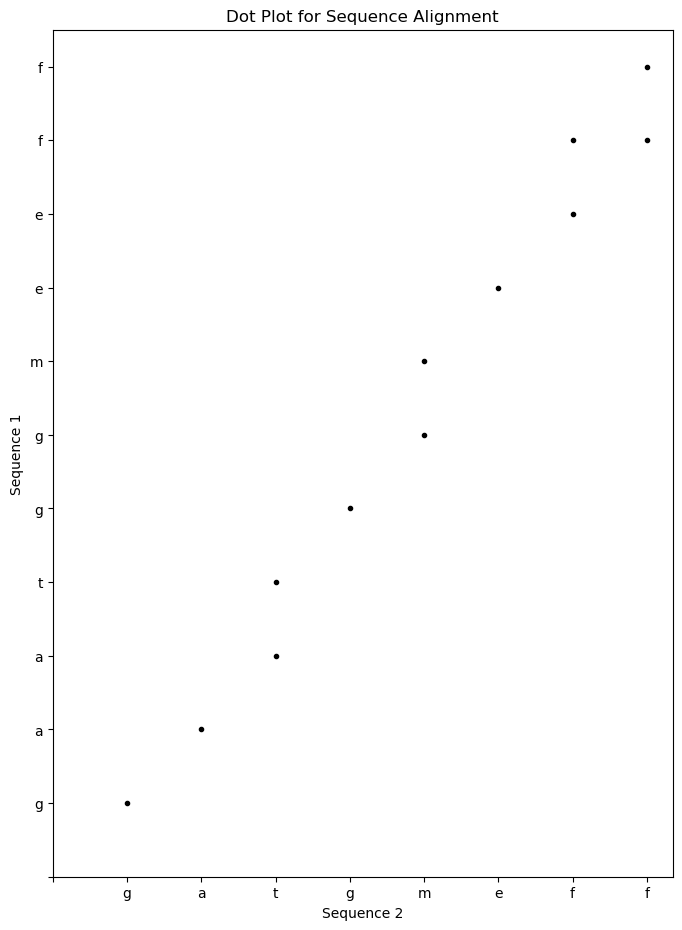

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def needleman_wunsch_dot_plot(seq1, seq2, match=1, mismatch=-1, gap_penalty=-2):
    m, n = len(seq1), len(seq2)
    
    # Initialize the matrix
    matrix = np.zeros((m + 1, n + 1))
    
    # Initialize the first row and column with gap penalties
    for i in range(1, m + 1):
        matrix[i][0] = matrix[i-1][0] + gap_penalty
    for j in range(1, n + 1):
        matrix[0][j] = matrix[0][j-1] + gap_penalty
    
    # Fill in the matrix
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            match_score = matrix[i-1][j-1] + (match if seq1[i-1] == seq2[j-1] else mismatch)
            delete_score = matrix[i-1][j] + gap_penalty
            insert_score = matrix[i][j-1] + gap_penalty
            matrix[i][j] = max(match_score, delete_score, insert_score)
    
    # Create a dot plot
    plt.figure(figsize=(n, m))

    for i in range(m + 1):
        for j in range(n + 1):
            if matrix[i][j] > 0:
                plt.scatter(j, i, c='black', marker='.')

    # Set tick labels based on sequences
    plt.xticks(range(n + 1), [''] + list(seq2))
    plt.yticks(range(m + 1), [''] + list(seq1))

    plt.title('Dot Plot for Sequence Alignment')
    plt.xlabel('Sequence 2')
    plt.ylabel('Sequence 1')
    plt.show()

    # Rest of the code remains the same for backtracking and alignment sequences
    # ...

# Example usage:
sequence1 = "gaatggmeeff"
sequence2 = "gatgmeff"

needleman_wunsch_dot_plot(sequence1, sequence2)


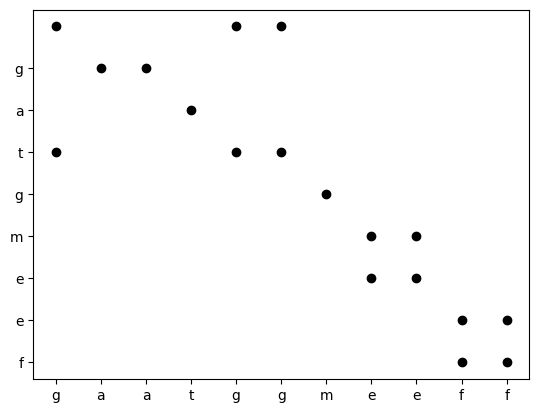

In [21]:
import matplotlib.pyplot as plt

seq1 = "gaatggmeeff"
seq2 = "gatgmeeff"

def create_dot_plot(seq1, seq2):
    matrix = [[1 if seq1[i] == seq2[j] else 0 for j in range(len(seq2))] for i in range(len(seq1))]
    
    fig, ax = plt.subplots()
    
    ax.set_xticks(range(len(seq1)))
    ax.set_yticks(range(-len(seq2), 0))
    
    ax.set_xticklabels(list(seq1))
    ax.set_yticklabels(list(seq2[::-1]))  # Reverse the order of y-axis labels
    
    for i in range(len(seq1)):
        for j in range(len(seq2)):
            if matrix[i][j] == 1:
                ax.plot(i, -j, 'ko')  # Matches
    
    plt.show()

create_dot_plot(seq1, seq2)


In [22]:
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable


In [23]:
# Define sequences
X = "gaatggmentff"
Y = "gatgmeff"


In [24]:
# Initialize matrix with zeros
m = len(X)
n = len(Y)
matrix = [[0] * (n + 1) for _ in range(m + 1)]


In [25]:
# Define gap penalty and mismatch penalty
gap_penalty = -1
mismatch_penalty = -1

# Fill in the matrix using Needleman-Wunsch algorithm
for i in range(1, m + 1):
    for j in range(1, n + 1):
        match = matrix[i-1][j-1] + (1 if X[i-1] == Y[j-1] else mismatch_penalty)
        delete = matrix[i-1][j] + gap_penalty
        insert = matrix[i][j-1] + gap_penalty
        matrix[i][j] = max(match, delete, insert)


In [26]:
# Display matrix in markdown table format
from tabulate import tabulate

headers = [""] + [char for char in Y]
rows = [[X[i-1]] + matrix[i] for i in range(1, m + 1)]

matrix_table = tabulate(rows, headers, tablefmt="pipe")
print(matrix_table)


|    |    |   g |   a |   t |   g |   m |   e |   f |   f |
|:---|---:|----:|----:|----:|----:|----:|----:|----:|----:|
| g  |  0 |   1 |   0 |  -1 |   1 |   0 |  -1 |  -1 |  -1 |
| a  |  0 |   0 |   2 |   1 |   0 |   0 |  -1 |  -2 |  -2 |
| a  |  0 |  -1 |   1 |   1 |   0 |  -1 |  -1 |  -2 |  -3 |
| t  |  0 |  -1 |   0 |   2 |   1 |   0 |  -1 |  -2 |  -3 |
| g  |  0 |   1 |   0 |   1 |   3 |   2 |   1 |   0 |  -1 |
| g  |  0 |   1 |   0 |   0 |   2 |   2 |   1 |   0 |  -1 |
| m  |  0 |   0 |   0 |  -1 |   1 |   3 |   2 |   1 |   0 |
| e  |  0 |  -1 |  -1 |  -1 |   0 |   2 |   4 |   3 |   2 |
| n  |  0 |  -1 |  -2 |  -2 |  -1 |   1 |   3 |   3 |   2 |
| t  |  0 |  -1 |  -2 |  -1 |  -2 |   0 |   2 |   2 |   2 |
| f  |  0 |  -1 |  -2 |  -2 |  -2 |  -1 |   1 |   3 |   3 |
| f  |  0 |  -1 |  -2 |  -3 |  -3 |  -2 |   0 |   2 |   4 |


|    | g  | a  | a  | t  | g  | m  | m  | e  | f  | f  |
|----|----|----|----|----|----|----|----|----|----|----|
| 0  | -2 | -4 | -6 | -8 | -10| -12| -14| -16| -18| -20 |
| g  | -2 | 1  | -1 | -3 | -5 | -7 | -9 | -11| -13| -15|
| a  | -4 | -1 | 2  | 1  | -1 | -3 | -5 | -7 | -9 | -11|
| t  | -6 | -3 | 1  | 3  | 2  | 1  | -1 | -3 | -5 | -7 |
| g  | -8 | -5 | 0  | 2  | 4  | 3  | 2  | 1  | -1 | -3 |
| m  | -10| -7 | -2 | 1  | 3  | 5  | 4  | 3  | 2  | 0  |
| e  | -12| -9 | -4 | -1 | 1  | 4  | 6  | 5  | 4  | 2  |
| f  | -14| -11| -6 | -3 | 0  | 2  | 5  | 7  | 6  | 5  |
| f  | -16| -13| -8 | -5 | -2 | 0  | 3  | 6  | 8  | 7  |



      g a a t g g m e e f f
    0 0 0 0 0 0 0 0 0 0 0 0
g   0 1 0 0 0 0 0 0 0 0 0 0
a   0 0 2 1 0 0 0 0 0 0 0 0
t   0 0 1 3 2 1 0 0 0 0 0 0
g   0 0 0 2 4 3 2 1 0 0 0 0
m   0 0 0 0 0 0 0 0 0 0 0 0
e   0 0 0 0 0 0 0 0 0 0 0 0
f   0 0 0 0 0 0 0 0 0 0 0 0
f   0 0 0 0 0 0 0 0 0 0 0 0


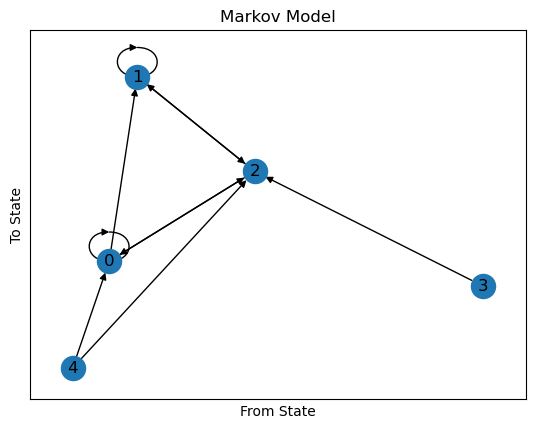

In [29]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the transition matrix
P = np.array([
    [0.2, 0.7, 0.1],
    [0.0, 0.5, 0.5],
    [0.8, 0.2, 0.0],
    [0.0, 0.0, 1.0],
    [0.7, 0.0, 0.3],
])

# Define state labels
states = ["A", "G", "B", "T", "E"]

# Create the graph
fig, ax = plt.subplots()
G = nx.DiGraph()

# Add nodes
for i, state in enumerate(states):
    G.add_node(i, label=state)

# Add edges with transition probabilities
for i in range(len(P)):
    for j in range(len(P[i])):
        if P[i][j] > 0:
            G.add_weighted_edges_from([(i, j, P[i][j])])

# Draw the graph
nx.draw_networkx(G, pos=nx.spring_layout(G), ax=ax)

# Customize the plot
ax.set_title("Markov Model")
ax.set_xlabel("From State")
ax.set_ylabel("To State")

# Save the plot
plt.savefig("markov_model.png")

# Display the plot in Jupyter Notebook
plt.show()
